### **Supervised ML - Classification - Decision Trees**

In [1]:
import pandas as pd
import numpy as np

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris.columns = ['sep_len','sep_width','pet_len','pet_width','flower']
iris.head()

,sep_len,sep_width,pet_len,pet_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris['flower'] = le.fit_transform(iris['flower'])

iris.head()

,sep_len,sep_width,pet_len,pet_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
iris['flower'].value_counts()

0    50
1    50
2    50
Name: flower, dtype: int64

In [4]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = iris[['sep_len', 'sep_width', 'pet_len', 'pet_width']]
Y = iris['flower']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=30, random_state=100)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [9]:
from sklearn.model_selection import cross_val_score

Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtreeClass_1 = DecisionTreeClassifier()
#dtreeClass_2 = DecisionTreeClassifier()

In [70]:
dtreeClass_1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [71]:
dtreeClass_1.fit(X_train, Y_train)

DecisionTreeClassifier()

In [72]:
dtreeClass_1.score(X_test, Y_test)

0.9666666666666667

In [73]:
Y_pred = dtreeClass_1.predict(X_test)
Y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

In [74]:
dtreeClass_1.predict_proba(X_test)
#probs are 0/1 because we allowed the tree to grow (have pure classes at the end) and learn.
#when we place a max-depth we will see the prediction probability will be shared across (less confidence)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

accuracy_score(Y_test,Y_pred)

0.9666666666666667

In [76]:
confusion_matrix(Y_test, Y_pred)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

In [77]:
dtreeClass_1.classes_

array([0, 1, 2])

In [78]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

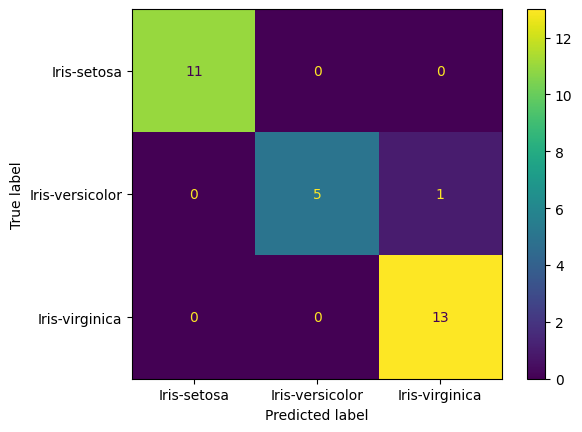

In [79]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred), display_labels = le.classes_).plot()

In [32]:
print(
    classification_report(Y_test, Y_pred, target_names=le.classes_)
)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



**Decision Trees are interpretable - Understanding your model**

In [43]:
feature_names = X.columns
feature_names

Index(['sep_len', 'sep_width', 'pet_len', 'pet_width'], dtype='object')

In [48]:
feature_importance_level = pd.DataFrame(dtreeClass_1.feature_importances_, index=feature_names)
feature_importance_level

,0
sep_len,0.000000
sep_width,0.031335
pet_len,0.077213
pet_width,0.891452


In [49]:
features = list(feature_importance_level[feature_importance_level[0]>0].index)
features

['sep_width', 'pet_len', 'pet_width']

<AxesSubplot:>

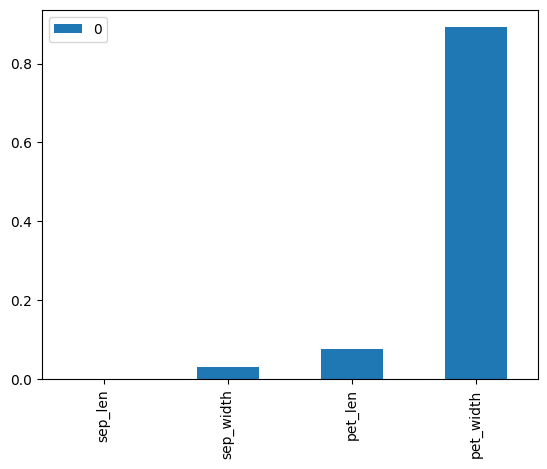

In [50]:
feature_importance_level.plot(kind='bar')

**Plot the tree - Understanding your model**
 - show how the model decides

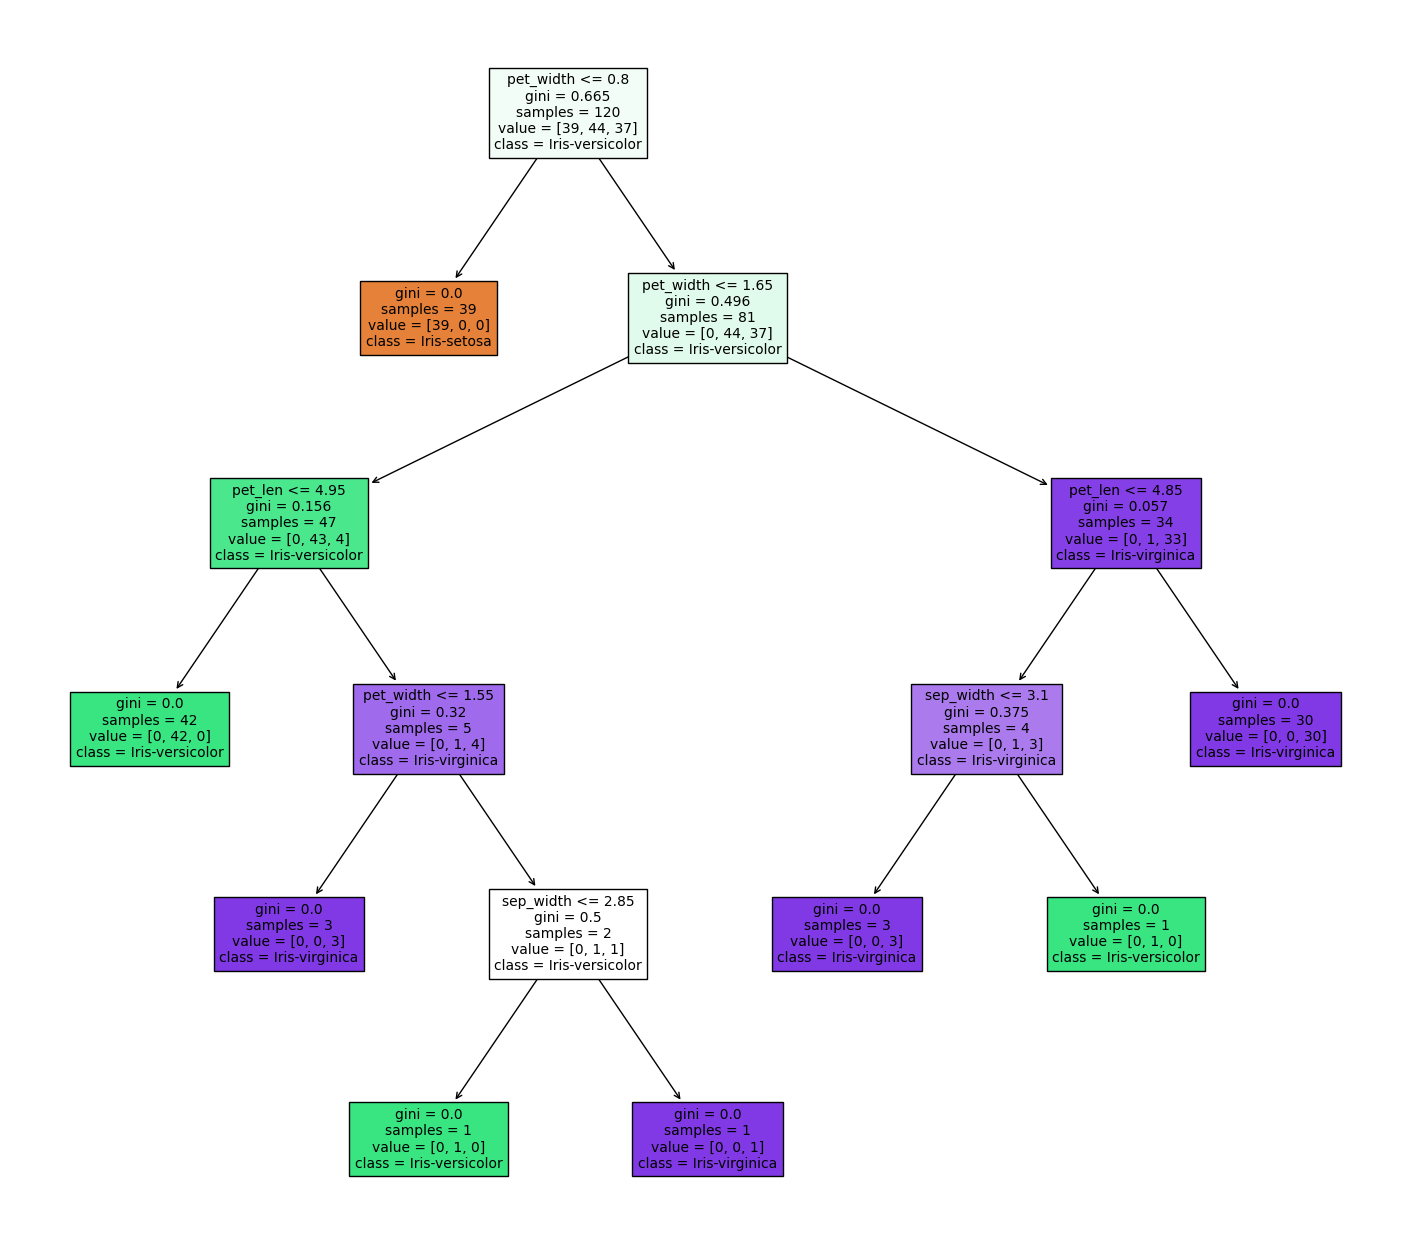

In [53]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,16))

tree.plot_tree(dtreeClass_1,
               feature_names=feature_names,
               class_names=le.classes_,
               filled=True,
               fontsize=10
               )

plt.show()